# Permutation + a full part of LOOCV
# Palleja & Suez GMM baseline random forest permutation, using interpolated data!!!
## Using vegdist (Bray-Curtis)
## LHS is "distance * day", not distance!!
## Time points are realgined between Suez and Palleja!!

## 1. Exploratory Data Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
species = pd.read_csv("/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Interpolate_missing_timepoint/Palleja_Suez_GMM_baseline_vegdist_bray_interpolated_realigned_timepoint_forML.txt",
                   delimiter = "\t")

In [32]:
species.head()

,Sample_id,recovered_realigned_day,lowest_dist,DistxDay,Timepoint_realign,Study,Perturbance_scale,MF0001,MF0002,MF0003,...,MF0124,MF0125,MF0126,MF0127,MF0128,MF0129,MF0130,MF0131,MF0132,MF0133
0,801,56,0.065118,3.646622,Baseline,Suez,0.150623,104,71,66,...,158,59,22,76,8,4,11,8,104,34
1,802,52,0.048234,2.508186,Baseline,Suez,0.150256,82,55,69,...,164,87,22,94,1,31,21,11,66,55
2,803,31,0.054971,1.704094,Baseline,Suez,0.079068,87,50,82,...,177,85,39,89,5,6,18,3,74,43
3,804,5,0.038956,0.194780,Baseline,Suez,0.078213,79,53,74,...,169,98,15,92,2,19,18,8,79,53
4,805,56,0.062680,3.510108,Baseline,Suez,0.147491,82,50,85,...,164,83,25,86,1,14,19,4,105,44


In [33]:
species.shape

(19, 137)

## 2. Set up evaluation environment. Use stratified 5-fold CV to determine the accuracy of the model

In [34]:
my_data = species.drop(columns=['recovered_realigned_day', 'lowest_dist', 'Timepoint_realign', 'Study'])

In [35]:
my_data.head()

,Sample_id,DistxDay,Perturbance_scale,MF0001,MF0002,MF0003,MF0004,MF0005,MF0006,MF0007,...,MF0124,MF0125,MF0126,MF0127,MF0128,MF0129,MF0130,MF0131,MF0132,MF0133
0,801,3.646622,0.150623,104,71,66,3,20,15,94,...,158,59,22,76,8,4,11,8,104,34
1,802,2.508186,0.150256,82,55,69,3,25,9,88,...,164,87,22,94,1,31,21,11,66,55
2,803,1.704094,0.079068,87,50,82,2,23,10,107,...,177,85,39,89,5,6,18,3,74,43
3,804,0.194780,0.078213,79,53,74,2,16,14,110,...,169,98,15,92,2,19,18,8,79,53
4,805,3.510108,0.147491,82,50,85,2,23,11,94,...,164,83,25,86,1,14,19,4,105,44


In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [37]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [39]:
seed = 42

In [40]:
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay

In [41]:
X.head()

,Perturbance_scale,MF0001,MF0002,MF0003,MF0004,MF0005,MF0006,MF0007,MF0008,MF0009,...,MF0124,MF0125,MF0126,MF0127,MF0128,MF0129,MF0130,MF0131,MF0132,MF0133
0,0.150623,104,71,66,3,20,15,94,94,6,...,158,59,22,76,8,4,11,8,104,34
1,0.150256,82,55,69,3,25,9,88,88,23,...,164,87,22,94,1,31,21,11,66,55
2,0.079068,87,50,82,2,23,10,107,108,6,...,177,85,39,89,5,6,18,3,74,43
3,0.078213,79,53,74,2,16,14,110,110,14,...,169,98,15,92,2,19,18,8,79,53
4,0.147491,82,50,85,2,23,11,94,94,8,...,164,83,25,86,1,14,19,4,105,44


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5)

In [43]:
# Max_depth = 2, max_features = "log2"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators= 375, 
                            oob_score=True, max_features = "log2")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy

Avg kfold neg MSE: -1.401224528909453


In [44]:
# R-squared (R2) score for the regression
result_r2 = cross_val_score(RF_1, X, y, cv=kf, scoring="r2")
avg_r2 = round(result_r2.mean(), 3)
print("Avg kfold R2 Score: {}".format(avg_r2))

Avg kfold R2 Score: -2.667


In [45]:
# Get the Spearman's rho for the training data in each cross-validation fold
# Correlating V1-V2 distance and feature baseline abundance
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
import numpy as np

seed = 42
X, y = my_data.drop(columns=['Sample_id','DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5, random_state=seed, shuffle=True)

# Specify the top 10 features 
selected_features = ['MF0019',
 'MF0020',
 'Perturbance_scale',
 'MF0103',
 'MF0091',
 'MF0008',
 'MF0076',
 'MF0011',
 'MF0072',
 'MF0097']

# Initialize lists to store Spearman's rho values for selected features
# Initializes a dictionary where each feature in selected_features is a key, and the corresponding value is an empty list 
spearman_rho_per_feature = {feature: [] for feature in selected_features}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for feature in selected_features:
        rho, _ = spearmanr(X_train[feature], y_train)
        spearman_rho_per_feature[feature].append(rho)

# Print mean, std, and range for each selected feature
for feature in selected_features:
    mean_rho = np.mean(spearman_rho_per_feature[feature])
    std_rho = np.std(spearman_rho_per_feature[feature])
    range_str = "({:.2f}, {:.2f})".format(mean_rho - std_rho, mean_rho + std_rho)
    print("Feature: {}, Mean Spearman's rho ± std on Training Data: {:.2f} ± {:.2f} {}".format(feature, mean_rho, std_rho, range_str))

Feature: MF0019, Mean Spearman's rho ± std on Training Data: -0.65 ± 0.06 (-0.71, -0.59)
Feature: MF0020, Mean Spearman's rho ± std on Training Data: 0.44 ± 0.06 (0.38, 0.50)
Feature: Perturbance_scale, Mean Spearman's rho ± std on Training Data: 0.64 ± 0.10 (0.54, 0.74)
Feature: MF0103, Mean Spearman's rho ± std on Training Data: 0.39 ± 0.11 (0.28, 0.50)
Feature: MF0091, Mean Spearman's rho ± std on Training Data: 0.38 ± 0.14 (0.24, 0.51)
Feature: MF0008, Mean Spearman's rho ± std on Training Data: 0.07 ± 0.14 (-0.07, 0.21)
Feature: MF0076, Mean Spearman's rho ± std on Training Data: -0.37 ± 0.09 (-0.46, -0.29)
Feature: MF0011, Mean Spearman's rho ± std on Training Data: 0.01 ± 0.14 (-0.12, 0.15)
Feature: MF0072, Mean Spearman's rho ± std on Training Data: -0.41 ± 0.09 (-0.50, -0.32)
Feature: MF0097, Mean Spearman's rho ± std on Training Data: -0.46 ± 0.11 (-0.57, -0.36)


### Correlate real Distxday and preidicted Distxday to check model performance

In [14]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import spearmanr
#from scipy.stats import pearsonr

In [15]:
# Get cross-validated predictions for each data point
y_pred = cross_val_predict(RF_1, X, y, cv=kf)

In [16]:
#y_pred

In [17]:
#y

In [18]:
# Calculate the Spearman correlation coefficient for the actual vs. predicted across all individuals
correlation, p_value = spearmanr(y, y_pred)

In [19]:
print(f"Spearman correlation coefficient for all individuals: {correlation:.3f}")
print(f"P-value for the Spearman correlation: {p_value:.3f}")

Spearman correlation coefficient for all individuals: -0.514
P-value for the Spearman correlation: 0.024


Text(0.19477989871445303, 3.989998061419452, 'Spearman correlation: -0.51')

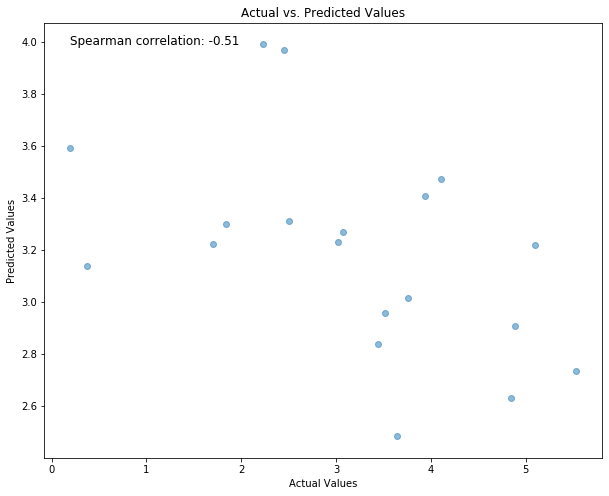

In [20]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
plt.scatter(y, y_pred, alpha=0.5)  # Plot y vs. y_pred

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Optionally, you can annotate the Spearman correlation on the plot
corr, _ = spearmanr(y, y_pred)
plt.text(min(y), max(y_pred), f'Spearman correlation: {corr:.2f}', fontsize=12)


## Step 4: Permutation
**First shuffle DistxDay against other columns, and then do random forest. Repeat this 1000 times**

In [15]:
# Permutation
from collections import OrderedDict

seed=42
kf = KFold(n_splits=5)
# Max_depth = 2, max_features = "log2", n_estimators=375, the same setting as the one above
RF_shuffle = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators= 375, 
                            oob_score=False, max_features = "log2")

permu_times = 1000

#Create an empty array first
#https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
permutation_negMSE=a = np.empty(shape=(permu_times,1))

for i in range(1, permu_times + 1):
        #First copy my_data using pandas.DataFrame.copy (the correct way to do this!)
        #https://moonbooks.org/Articles/How-to-copy-a-dataframe-with-pandas-in-python-/
        shuffled_data = my_data.copy()

        #Then shuffle data
        shuffled_data['DistxDay'] = shuffled_data['DistxDay'].sample(frac=1, random_state=i).reset_index(drop=True)
        
        #Then run random forest
        X_shuffle, y_shuffle = shuffled_data.drop(columns=['Sample_id','DistxDay']), shuffled_data.DistxDay
        result_negMSE_shuffle = cross_val_score(RF_shuffle, X_shuffle, y_shuffle, cv = kf, scoring="neg_mean_absolute_error")
        
        # Record the neg MSE for each permutation
        negMSE=result_negMSE_shuffle.mean() #Print average negMSE
        permutation_negMSE[i-1]=negMSE

In [16]:
len(permutation_negMSE)

1000

Text(0.5, 1.0, 'Permutation negative MSE histogram')

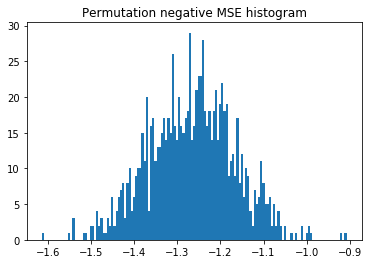

In [17]:
# Plot a histogram
binwidth=0.005
plt.hist(permutation_negMSE, bins=np.arange(min(permutation_negMSE), max(permutation_negMSE) 
                                            + binwidth, binwidth))
plt.title("Permutation negative MSE histogram") 

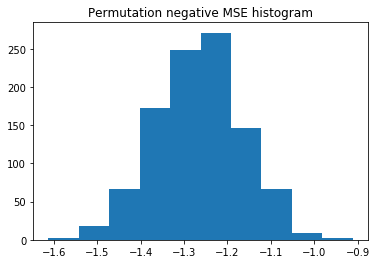

In [18]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMSE)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [19]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMSE, 95)

-1.102152426512365

## Step 5: Random Forest (using leave-one-out cross-validation)

In [46]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

seed = 42
X, y = my_data.drop(columns=['Sample_id','DistxDay']), my_data.DistxDay

# Initialize LeaveOneOut object
loo = LeaveOneOut()

# Initialize an array of zeros to hold feature importances
# X.shape[1]: This is the number of columns (features)
# loo.get_n_splits(X): This is the number of splits in LOOCV
individual_feature_importances = np.zeros((X.shape[1], loo.get_n_splits(X)))

# Initialize an empty list to hold the negative MAE scores
neg_mae_scores_loo = []

# Initialize an array to store all LOOCV predictions (for correlation of y and y_pred later)
y_preds_array = np.zeros(len(y))

# Loop over the LOOCV folds
for fold, (train_index, test_index) in enumerate(loo.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the model with the same hyperparameters
    RF = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators=375,
                               oob_score=True, max_features="log2")
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = RF.predict(X_test)
    y_preds_array[test_index] = y_pred
    
    # Calculate the MAE for the current fold and append it to the list
    mae = mean_absolute_error(y_test, y_pred)
    neg_mae_scores_loo.append(-mae)  # We negate the MAE to follow your requirement
    
    # Accumulate feature importances for this fold
    individual_feature_importances[:, fold] = RF.feature_importances_

# Calculate median of feature importances
median_importances = np.median(individual_feature_importances, axis=1)

# Sort the mean feature importances in descending order and get the indices
sorted_median_idx = np.argsort(median_importances)[::-1]

# Get the names of the top 10 features based on mean importance
top_10_median_feature_names = X.columns[sorted_median_idx][:10]

# Get the mean importance scores of the top 10 features
top_10_median_importances = median_importances[sorted_median_idx][:10]

# After collecting all predictions, calculate the Spearman correlation
correlation, p_value = spearmanr(y, y_preds_array)

In [47]:
individual_feature_importances.shape

(131, 19)

In [48]:
# Print out the negative MAE scores for each fold
#print("Negative MAE scores for each fold: ", neg_mae_scores_loo)

# The average negative MAE score across all folds
print("Average negative MAE: ", np.mean(neg_mae_scores_loo))

Average negative MAE:  -1.2216510914951515


In [49]:
# Print the top 10 features and their importances
# Use zip because top_10_feature_names and top_10_importances are two iterables that we want to loop over simultaneously.
for name, importance in zip(top_10_median_feature_names, top_10_median_importances):
    print(f"{name}: {importance}")

MF0019: 0.035235047565390656
Perturbance_scale: 0.035090022672946294
MF0042: 0.02856879586845316
MF0022: 0.026983981702081106
MF0103: 0.02541873007814689
MF0072: 0.01997484021406515
MF0089: 0.01967050590649614
MF0021: 0.018217740212991024
MF0008: 0.017131006918168705
MF0097: 0.0170600221344951


In [50]:
#Print the correlation rho and p-value
print(f"Spearman correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation: 0.095
P-value: 0.700


## Step 4: Permutation for LOOCV
**First shuffle Dist_V1V2 against other columns, and then do random forest. Repeat this 1000 times**

In [51]:
# Define the number of permutations
permu_times = 1000

# Create an empty array to store the neg MAE for each permutation
permutation_negMAE_loo = np.empty(permu_times)

# Initialize LOO cross-validation
loo = LeaveOneOut()

# Initialize the random forest with the specified settings
RF_shuffle_loo = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators=375,
                                       oob_score=False, max_features="log2")

# Run the permutation test with LOO CV
for i in range(permu_times):
    
    # Print the value of i at every 50th iteration so that I know the progress
    # % is modulo calculation
    if i % 50 == 0:
        print(f"Current iteration: {i}")
    
    # Shuffle the 'DistxDay' column
    shuffled_target = my_data['DistxDay'].sample(frac=1, random_state=i).reset_index(drop=True)
    
    # Prepare the data for cross-validation
    X, y_shuffled = my_data.drop(columns=['Sample_id','DistxDay']), shuffled_target
    
    # Variable to accumulate the mean absolute error
    mae_sum = 0
    
    # Perform LOO cross-validation
    for train_index, test_index in loo.split(X):
        # Split the data into train and test for the current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_shuffled.iloc[train_index], y_shuffled.iloc[test_index]
        
        # Fit the model
        RF_shuffle_loo.fit(X_train, y_train)
        
        # Make predictions
        y_pred = RF_shuffle_loo.predict(X_test)
        
        # Calculate the MAE for the current fold and accumulate it
        mae_sum += mean_absolute_error(y_test, y_pred)
    
    # Calculate the average MAE over all folds and store the negative value
    permutation_negMAE_loo[i] = -mae_sum / loo.get_n_splits(X)

Current iteration: 0
Current iteration: 50
Current iteration: 100
Current iteration: 150
Current iteration: 200
Current iteration: 250
Current iteration: 300
Current iteration: 350
Current iteration: 400
Current iteration: 450
Current iteration: 500
Current iteration: 550
Current iteration: 600
Current iteration: 650
Current iteration: 700
Current iteration: 750
Current iteration: 800
Current iteration: 850
Current iteration: 900
Current iteration: 950


In [52]:
len(permutation_negMAE_loo)

1000

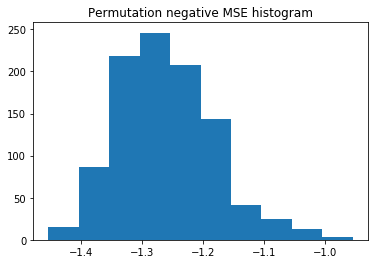

In [53]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMAE_loo)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [54]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMAE_loo, 95)

-1.1125726799016766

#### See if the RF (LOOCV) is significant

In [55]:
# Calculate the mean of the negative MAE scores from the actual LOOCV
actual_neg_mae_mean = np.mean(neg_mae_scores_loo)

# Calculate the 95th percentile of the negative MAE scores from the permutation test
percentile_95_loo = np.percentile(permutation_negMAE_loo, 95)

# Compare and print the result
if actual_neg_mae_mean > percentile_95_loo: #sig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is larger than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is significant\033[0m") #bold text
else: #Nonsig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is smaller than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is nonsignificant\033[0m") #bold text

Actual neg MAE (-1.2216510914951515) is smaller than 95% of the neg MAE from permutation (-1.1125726799016766)
RF is nonsignificant


In [56]:
# Calculate the percentage of permutation_negMAE_loo that is less than or equal to actual_neg_mae_mean
percentage_loo = np.mean(permutation_negMAE_loo <= actual_neg_mae_mean) * 100
p_value_loo = round(1 - percentage_loo/100, 3)
print(f"The actual_neg_mae_mean is in the {p_value_loo}% percentile of the permutation distribution, so the p value is {p_value_loo}")


The actual_neg_mae_mean is in the 0.278% percentile of the permutation distribution, so the p value is 0.278
